<a href="https://colab.research.google.com/github/lucaskydelima/Unoeste-Ciencia-de-Dados/blob/main/Aula03_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [113]:
# Importar os dados da planilha 'jogos.csv'
dados <- read.csv('jogos.csv')

# 0. Inspecionar o arquivo importado

In [114]:
# Listar as primeiras 6 linhas do data.frame criado
head(dados)

,Nome,Plataforma,Ano,Genero,Fabricante,Vendas_EUA,Vendas_Europa,Vendas_Japao,Vendas_Outros,Venda_Global
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Wii Sports,Wii,2006,Esportes,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985,Plataforma,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008,Corrida,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009,Esportes,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26


In [115]:
# Obter o número de linhas e colunas do data.frame
dim(dados)

[1] 16598    10

In [116]:
# Obter o tipo e o nome das colunas do data.frame
str(dados)

'data.frame':	16598 obs. of  10 variables:
 $ Nome         : chr  "Wii Sports" "Super Mario Bros." "Mario Kart Wii" "Wii Sports Resort" ...
 $ Plataforma   : chr  "Wii" "NES" "Wii" "Wii" ...
 $ Ano          : chr  "2006" "1985" "2008" "2009" ...
 $ Genero       : chr  "Esportes" "Plataforma" "Corrida" "Esportes" ...
 $ Fabricante   : chr  "Nintendo" "Nintendo" "Nintendo" "Nintendo" ...
 $ Vendas_EUA   : num  41.5 29.1 15.8 15.8 11.3 ...
 $ Vendas_Europa: num  29.02 3.58 12.88 11.01 8.89 ...
 $ Vendas_Japao : num  3.77 6.81 3.79 3.28 10.22 ...
 $ Vendas_Outros: num  8.46 0.77 3.31 2.96 1 0.58 2.9 2.85 2.26 0.47 ...
 $ Venda_Global : num  82.7 40.2 35.8 33 31.4 ...


# 1. Liste os jogos com Venda Global acima de U$ 20 mi (Dica: use o filter)

In [117]:
# Importar a biblioteca 'dplyr' para acesso a funções mais avançadas
library('dplyr')

In [118]:
# Filtrar a coluna 'Venda_Global' para valores acima de U$ 20 mi
vendaGlobalfiltrado <- dados %>% filter(Venda_Global > 20)
tail(vendaGlobalfiltrado) 

,Nome,Plataforma,Ano,Genero,Fabricante,Vendas_EUA,Vendas_Europa,Vendas_Japao,Vendas_Outros,Venda_Global
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
15,Wii Fit Plus,Wii,2009,Esportes,Nintendo,9.09,8.59,2.53,1.79,22.00
16,Kinect Adventures!,X360,2010,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82
17,Grand Theft Auto V,PS3,2013,Acao,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
18,Grand Theft Auto: San Andreas,PS2,2004,Acao,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81
19,Super Mario World,SNES,1990,Plataforma,Nintendo,12.78,3.75,3.54,0.55,20.61
20,Brain Age: Train Your Brain in Minutes a Day,DS,2005,Misc,Nintendo,4.75,9.26,4.16,2.05,20.22


# 2. Liste em ordem decrescente pela Venda Global, o Nome e Plataforma dos jogos do gênero “Ação” e “Esportes” (Dica: use o filter e o operador %in%)

In [119]:
# Jogos dos gêneros de 'Acao' e 'Esportes' ordenados pela coluna 'Venda_Global'
generoFiltrado <- dados %>% 
                  filter(Genero %in% c('Acao','Esportes')) %>% 
                  select(c('Nome', 'Plataforma', 'Genero','Venda_Global')) %>% 
                  arrange(desc(Venda_Global)) 
head(generoFiltrado)

,Nome,Plataforma,Genero,Venda_Global
,<chr>,<chr>,<chr>,<dbl>
1,Wii Sports,Wii,Esportes,82.74
2,Wii Sports Resort,Wii,Esportes,33.00
3,Wii Fit,Wii,Esportes,22.72
4,Wii Fit Plus,Wii,Esportes,22.00
5,Grand Theft Auto V,PS3,Acao,21.40
6,Grand Theft Auto: San Andreas,PS2,Acao,20.81


# 3. Apresente a quantidade de jogos de cada gênero.

In [120]:
# Contar a quantidade de filmes por genêro
generoGrupo <- dados %>% group_by(Genero) %>% count() %>% as.data.frame
generoGrupo

Genero,n
<chr>,<int>
Acao,3316
Aventura,1286
Corrida,1249
Esportes,2346
Estrategia,681
Luta,848
Misc,1739
Plataforma,886
Puzzle,582


# 4. Qual o gênero que teve maior média de vendas no Japão?

In [121]:
generoVendasMediaJapao <- dados %>% 
                          group_by(Genero) %>% 
                          summarise_at(vars(Vendas_Japao), 
                          list(Media_Japao=mean), na.rm=TRUE) %>% 
                          as.data.frame %>%
                          arrange(desc(Media_Japao))
generoVendasMediaJapao

Genero,Media_Japao
<chr>,<dbl>
Role-Playing,0.23676747
Plataforma,0.14759594
Luta,0.10300708
Puzzle,0.09847079
Simulacao,0.07347174
Estrategia,0.07262849
Misc,0.06196665
Esportes,0.05770247
Acao,0.04823583


In [122]:
# Gênero com a maior média de vendas no Japão
generoVendasMediaJapao[1,]

,Genero,Media_Japao
,<chr>,<dbl>
1,Role-Playing,0.2367675


# 5. Qual o fabricante que teve maior venda global?

In [144]:
fabricanteVendaGlobal <- dados %>% 
                        group_by(Fabricante) %>% 
                        summarise_at(vars(Venda_Global), list(Vendas_Global=sum), na.rm=TRUE) %>% 
                        arrange(desc(Vendas_Global)) %>% 
                        as.data.frame
head(fabricanteVendaGlobal)

,Fabricante,Vendas_Global
,<chr>,<dbl>
1,Nintendo,1786.56
2,Electronic Arts,1110.32
3,Activision,727.46
4,Sony Computer Entertainment,607.50
5,Ubisoft,474.72
6,Take-Two Interactive,399.54


In [124]:
# Fabricante com a maior venda global
fabricanteVendaGlobal[1,]

,Fabricante,Vendas_Global
,<chr>,<dbl>
1,Nintendo,1786.56


# 6. Quantos jogos foram criados para cada tipo de Plataforma? 

In [125]:
# Quantidade de jogos fabricados por tipo de plataforma
plataformaGrupo <- dados %>% group_by(Plataforma) %>% count() %>% as.data.frame %>% arrange(desc(n))
head(plataformaGrupo) # TOP 6

,Plataforma,n
,<chr>,<int>
1,DS,2163
2,PS2,2161
3,PS3,1329
4,Wii,1325
5,X360,1265
6,PSP,1213


# 7. Liste os dados acrescentando três colunas adicionais por meio do comando Summarize agrupando por fabricante e indicando a quantidade de jogos de cada, a soma das vendas nos EUA e a média das vendas globais.

In [126]:
head(dados)

,Nome,Plataforma,Ano,Genero,Fabricante,Vendas_EUA,Vendas_Europa,Vendas_Japao,Vendas_Outros,Venda_Global
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Wii Sports,Wii,2006,Esportes,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985,Plataforma,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008,Corrida,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009,Esportes,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26


In [127]:
# Calcular as médias de vendas nos 'EUA' e 'Global' por fabricante
df_mediasVendas <- dados %>% 
                  group_by(Fabricante) %>% 
                  summarise_at(c('Vendas_EUA', 'Venda_Global'), mean, na.rm=TRUE) %>% 
                  as.data.frame %>%
                  arrange(Fabricante)
head(df_mediasVendas)

,Fabricante,Vendas_EUA,Venda_Global
,<chr>,<dbl>,<dbl>
1,10TACLE Studios,0.023333333,0.03666667
2,1C Company,0.003333333,0.03333333
3,20th Century Fox Video Games,0.364000000,0.38800000
4,2D Boy,0.000000000,0.04000000
5,3DO,0.180000000,0.28111111
6,49Games,0.000000000,0.04000000


In [128]:
# Calcular a quantidade de jogos por fabricante
df_quantidade <- dados %>% group_by(Fabricante) %>% count() %>% as.data.frame %>% arrange(Fabricante)
head(df_quantidade)

,Fabricante,n
,<chr>,<int>
1,10TACLE Studios,3
2,1C Company,3
3,20th Century Fox Video Games,5
4,2D Boy,1
5,3DO,36
6,49Games,1


In [129]:
# Mesclar as duas consultas 
df_media_quantidade <- cbind(df_mediasVendas, Quantidade = df_quantidade$n)
head(df_media_quantidade)

,Fabricante,Vendas_EUA,Venda_Global,Quantidade
,<chr>,<dbl>,<dbl>,<int>
1,10TACLE Studios,0.023333333,0.03666667,3
2,1C Company,0.003333333,0.03333333,3
3,20th Century Fox Video Games,0.364000000,0.38800000,5
4,2D Boy,0.000000000,0.04000000,1
5,3DO,0.180000000,0.28111111,36
6,49Games,0.000000000,0.04000000,1


# 8. Aplicação de 3 (três) gráficos a serem inseridos usando resultados das pesquisas acima (fica a escolha). 

In [130]:
library('tidyverse')

In [131]:
# Calcular a media Europa
df_europa <- dados %>% 
                  group_by(Fabricante) %>% 
                  summarise_at(c('Vendas_Europa','Venda_Global'), mean, na.rm=TRUE) %>% 
                  as.data.frame %>%
                  arrange(Fabricante)
head(df_europa)

,Fabricante,Vendas_Europa,Venda_Global
,<chr>,<dbl>,<dbl>
1,10TACLE Studios,0.01333333,0.03666667
2,1C Company,0.02333333,0.03333333
3,20th Century Fox Video Games,0.02000000,0.38800000
4,2D Boy,0.03000000,0.04000000
5,3DO,0.08444444,0.28111111
6,49Games,0.04000000,0.04000000


In [145]:
# Consulta 7 - # Correlaçõa positiva sugere que as vendas globais são influenciadas majoritariamente pelo mercado americano e europeu

options(repr.plot.width = 10, repr.plot.height =10)

base_eua <- ggplot(data = df_media_quantidade, aes(Vendas_EUA, Venda_Global, na.rm=TRUE)) + 
    geom_point(size=5, alpha=.5) +
    geom_smooth(method="loess")

label_eua <- base_eua + 
    labs(
    x = 'Vendas EUA',
    y = 'Vendas Global'
    ) +
    scale_colour_brewer(type = "seq", palette = "Spectral") + 
    xlim(0,.6) +
    ylim(0,1.5)

estilo_eua <- label_eua +
    theme_bw() + 
    theme(
    plot.title = element_text(face = "bold", size = 25, hjust = 0.5),
    axis.ticks = element_line(colour = "grey70", linewidth = 0.2),
    axis.title = element_text(size=22),
    axis.text = element_text(size=20),
    panel.grid.major = element_line(colour = "grey70", linewidth = 0.2),
    panel.grid.minor = element_blank()
  )

In [146]:
base_europa <- ggplot(data = df_europa, aes(Vendas_Europa, Venda_Global, na.rm=TRUE)) + 
    geom_point(size=5, alpha=.5) +
    geom_smooth(method="loess")

label_europa <- base_europa + 
    labs(
    x = 'Vendas Europa'
    ) +
    scale_colour_brewer(type = "seq", palette = "Spectral") + 
    xlim(0,.6) +
    ylim(0,1.5)

estilo_europa <- label_europa +
    theme_bw() + 
    theme(
    plot.title = element_text(face = "bold", size = 25, hjust = 0.5),
    axis.ticks = element_line(colour = "grey70", linewidth = 0.2),
    axis.title = element_text(size=22),
    axis.text = element_text(size=20),
    axis.title.y = element_blank(),
    axis.text.y = element_blank(),
    axis.ticks.y = element_blank(),
    panel.grid.major = element_line(colour = "grey70", linewidth = 0.2),
    panel.grid.minor = element_blank()
  )

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 19 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 19 rows containing missing values (`geom_point()`).”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 10 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 10 rows containing missing values (`geom_point()`).”


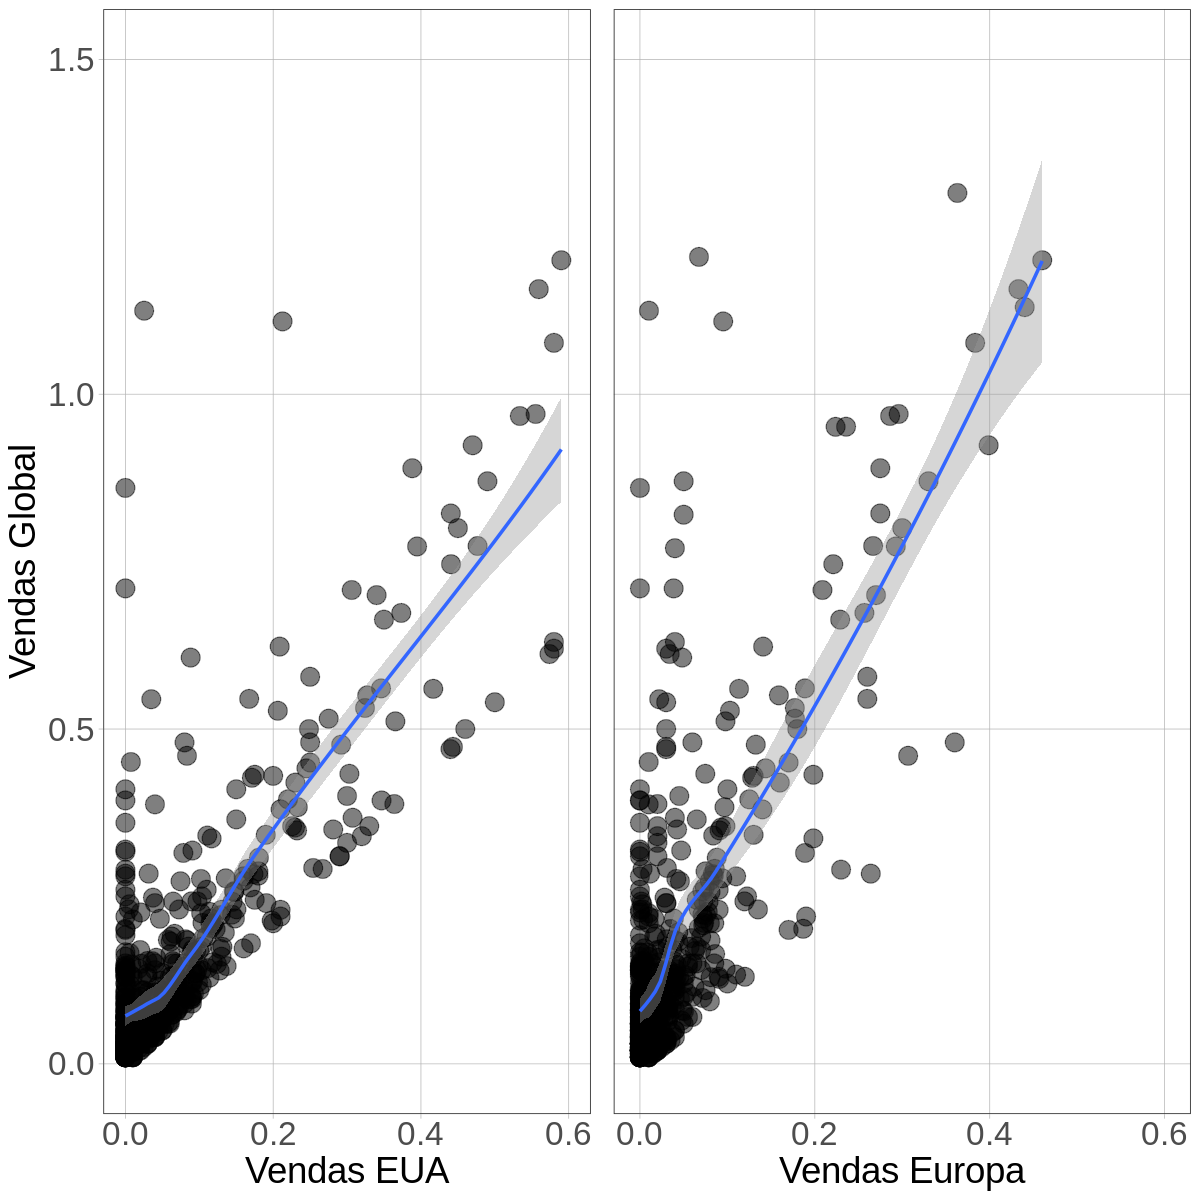

In [147]:
grid.arrange(estilo_eua, estilo_europa, ncol = 2)  

Warning message:
“Removed 2213 rows containing non-finite values (`stat_boxplot()`).”


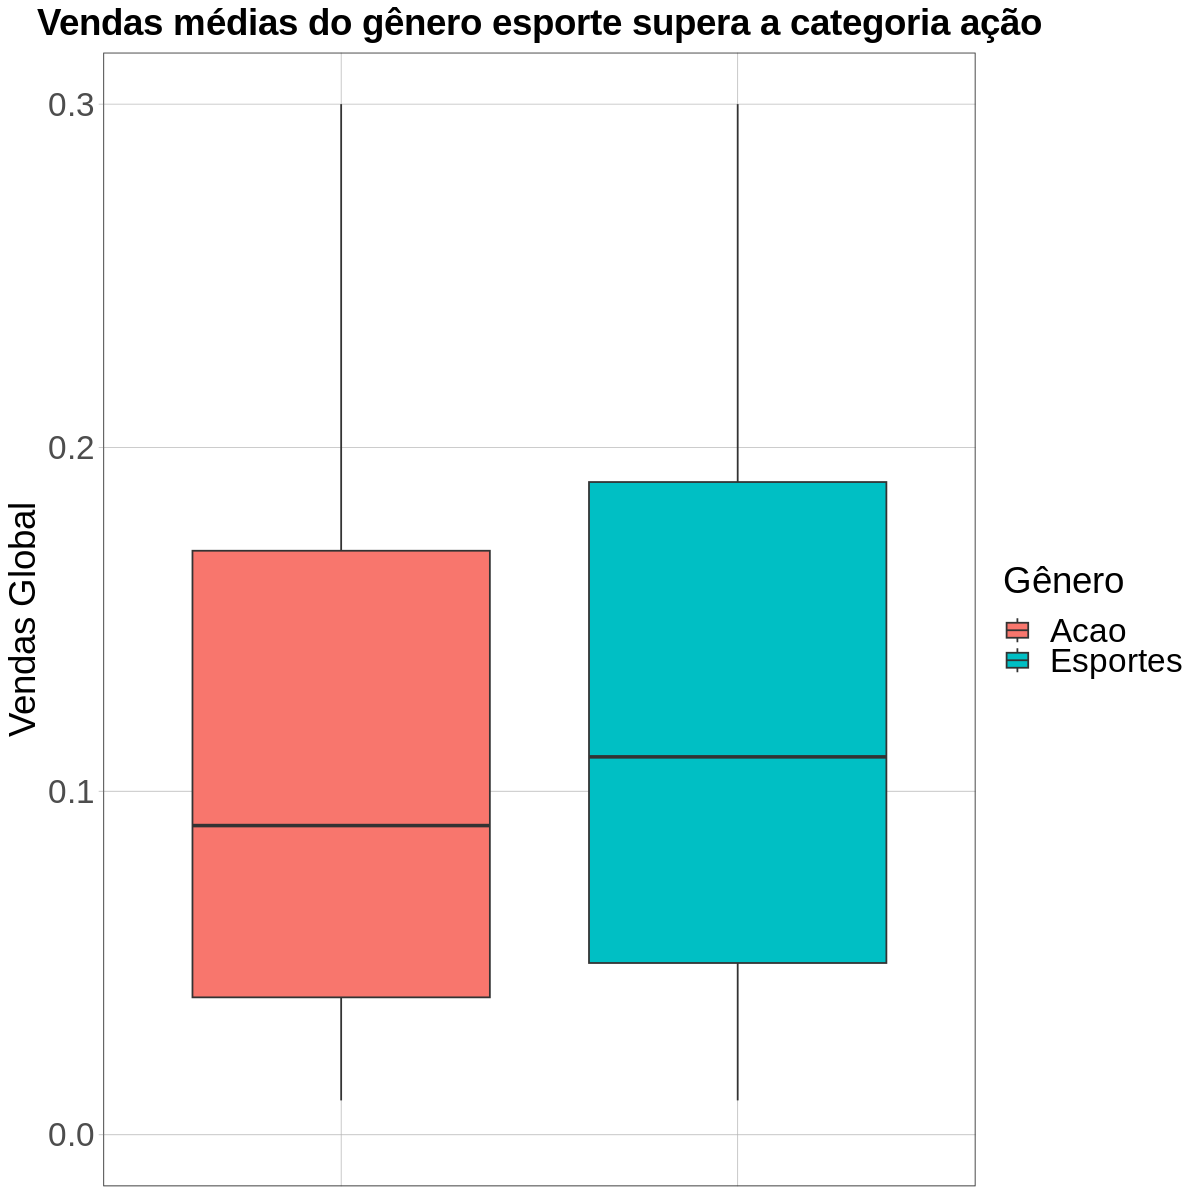

In [142]:
# Consulta 2 - O gênero esporte apresentou uma média de vendas global superior a categoria ação. A dispersão é praticamente igual.
base_global <- ggplot(generoFiltrado, aes(x=Genero, y=Venda_Global, fill=Genero, na.rm=TRUE)) + 
      geom_boxplot() 

label_global <- base_global +
    labs(
    y = 'Vendas Global',
    fill = 'Gênero',
    title = "Vendas médias do gênero esporte supera a categoria ação"
    ) +
    scale_colour_brewer(type = "seq", palette = "Spectral") + 
    ylim(0,.3) 

 estilo_global <- label_global +
    theme_bw() + 
    theme(
    plot.title = element_text(face = "bold", size = 22, hjust = 0.5),
    axis.ticks = element_line(colour = "grey70", linewidth = 0.2),
    axis.title = element_text(size=22),
    axis.text = element_text(size=20),
    axis.title.x=element_blank(),
    axis.text.x=element_blank(),
    axis.ticks.x=element_blank(),
    legend.title = element_text(size=22),
    legend.text = element_text(size=20),
    panel.grid.major = element_line(colour = "grey70", linewidth = 0.2),
    panel.grid.minor = element_blank()
  )
estilo_global


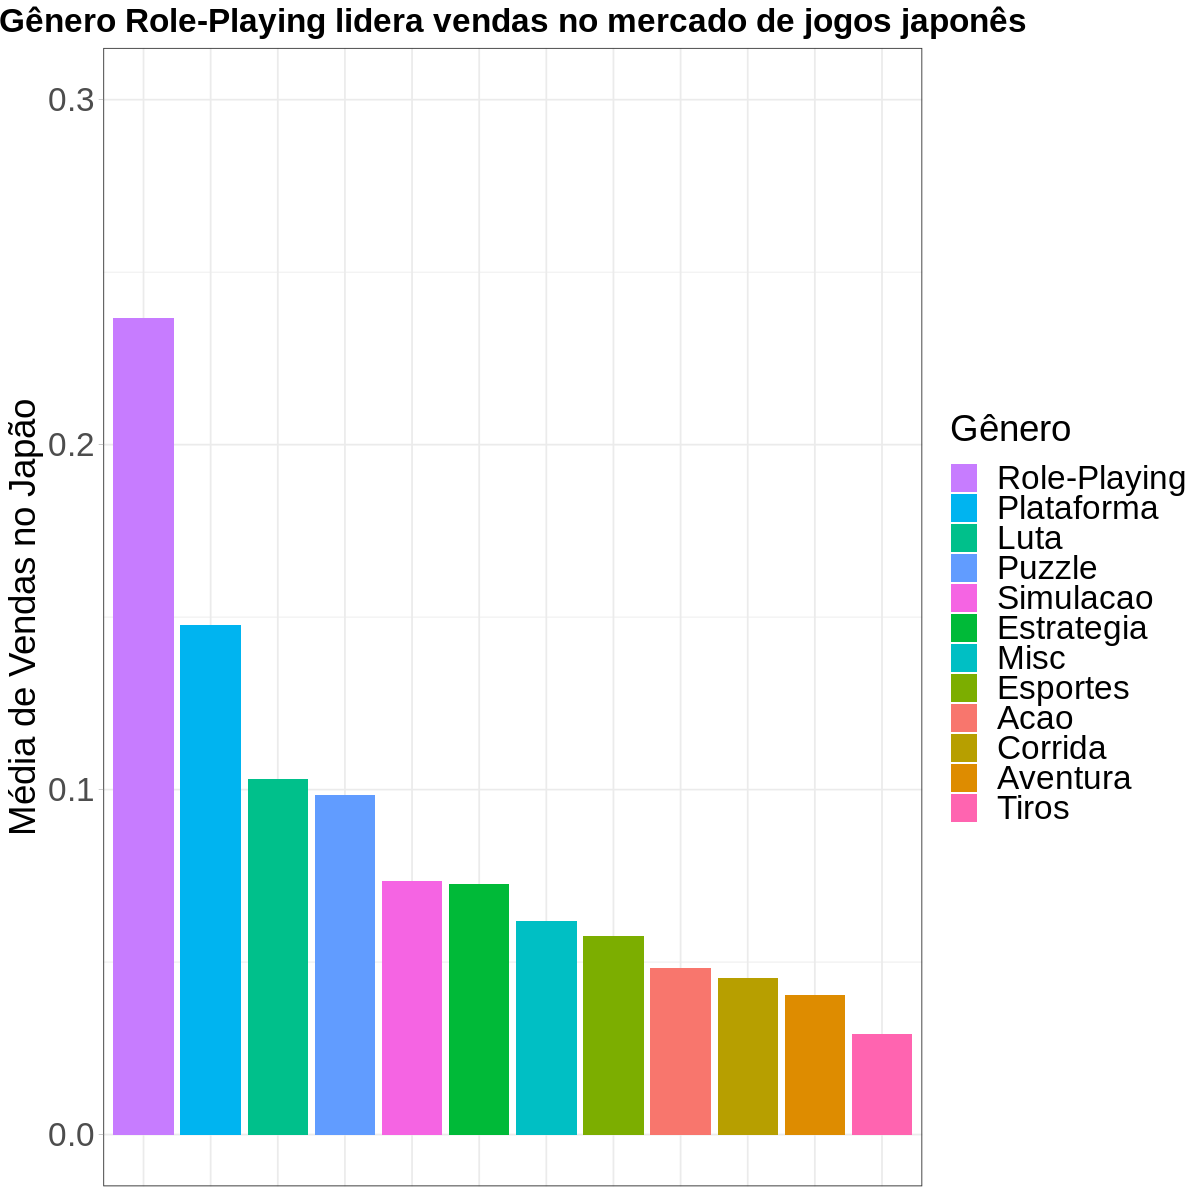

In [154]:
# Consulta 4 - O gênero 'role-playing' apresenta a maior média de vendas no mercado de jogos japonês
base_japao <- ggplot(generoVendasMediaJapao, aes(x=Genero, y=Media_Japao, fill=Genero, na.rm=TRUE)) + 
      geom_bar(stat="identity") + scale_x_discrete(limits = generoVendasMediaJapao$Genero) +
         scale_fill_discrete(breaks=generoVendasMediaJapao$Genero)

label_japao <- base_japao +
    labs(
    y = 'Média de Vendas no Japão',
    fill = 'Gênero',
    title = "Gênero Role-Playing lidera vendas no mercado de jogos japonês"
    ) +
    scale_colour_brewer(type = "seq", palette = "Spectral") + 
    ylim(0,.3) 

 estilo_japao <- label_japao +
    theme_bw() + 
    theme(
    plot.title = element_text(face = "bold", size = 20, hjust = 0.5),
    axis.ticks = element_line(colour = "grey70", linewidth = 0.2),
    axis.title = element_text(size=22),
    axis.text = element_text(size=20),
    axis.title.x=element_blank(),
    axis.text.x=element_blank(),
    axis.ticks.x=element_blank(),
    legend.title = element_text(size=22),
    legend.text = element_text(size=20)
  )

estilo_japao